#### Import Required Libraries

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#### Prepare Iris Dataset for SVM

In [56]:
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names) 
df['target'] = iris.target
df["target_name"] = iris.target_names[df['target']]
df.tail(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


#### Define and Splits Features Attributes and Target Atrribute

In [57]:
X = df.drop(["target", "target_name"], axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Train Model

In [58]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

#### Print Model Accuracy

In [59]:
print(f"Model Accuracy: {svm_model.score(X_test, y_test)*100}%")

Model Accuracy: 100.0%


#### Print Classification Report

In [60]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Plot the Confusion Matrix 

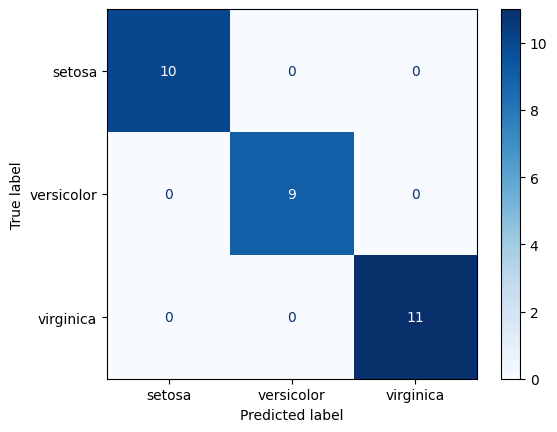

In [61]:
y_pred = svm_model.predict(X_test)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
display_cm = ConfusionMatrixDisplay(cm, display_labels=iris.target_names[svm_model.classes_])
display_cm.plot(cmap="Blues")
plt.show()

#### Predict Class Label for Custom Sample Data

In [62]:
def predict_custom_sample(sample_data):
    if(svm_model.predict([sample_data]) == 0):
        return "setosa"
    elif(svm_model.predict([sample_data]) == 1):
        return "versicolor"
    else:
        return "virginica"

In [ ]:
custom_sample_data = [6.3,2.5,5.0,1.9]
print(f"The given sample is a flower: {predict_custom_sample(custom_sample_data)}")

The given sample is a flower: virginica


In [64]:
1

1